# Лабораторная работа №1.  ДВПФ и ДПФ

# Модуль 1. Свойства ДВПФ.

# Вариант 2

In [2]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt

## Задача 1.1. ДВПФ и взвешивание гармонического сигнала окном


| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |    10 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:| 
|    $N$    | 12 | 17 | 14 | 15 | 13 | 16 | 20 | 24 | 22 | 18 |
|$n_0$|  3 |  5 |  2 |  5 |  4 |  6 |  7 |  7 |  5 |  5 |


Найти аналитически ДВПФ $N$ - точечных последовательностей
$$x[k]=\sum_{m=0}^{N-1}\mathbf{1}[k-m]\;\;\;\;y[k]=x[k]\cos\left(2\pi k\dfrac{n_0}{N}\right)$$  

Построить графики последовательностей $x[k]$ и $y[k]$.
Изобразить графики модуля ДВПФ для частот $\nu \in [-0.5, \; 0.5]$
* а) используя полученные аналитические формулы;
* б) используя функцию ```np.fft.fft()```.

Сравнить полученные результаты. 

In [22]:
def plot_stem(k, f, ylbl='y[k]', xlbl='k'):
    plt.figure(figsize=[10, 3])
    plt.stem(k, f)
    plt.ylabel(ylbl)
    plt.xlabel(xlbl)
    plt.grid()


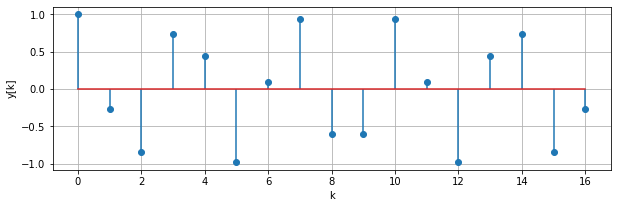

In [21]:
N = 17
n_0 = 5
cnts = np.arange(N)
y = np.cos(2 * np.pi * n_0 * cnts / N)

plot_stem(cnts, y)

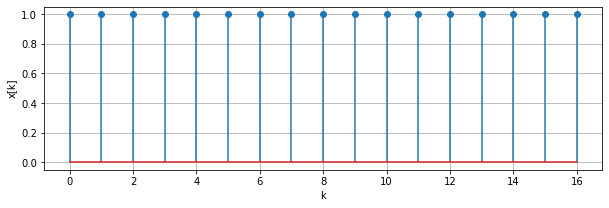

In [50]:
x = np.ones(N)
plot_stem(cnts, x, ylbl='x[k]')

Аналитическое решение для $x[k]$:

$X(\nu) = \frac{sin(N\pi\nu)}{\sin(\pi\nu)} \exp(-j(N-1)\pi\nu)$


$|X(\nu)| = |\frac{sin(N\pi\nu)}{\sin(\pi\nu)}|$



Аналитическое решение для $y[k]$:

$y[k] = \frac{1}{2} x[k] (\exp(j2\pi k \frac{n_0}{N}) + \exp(-j2\pi k \frac{n_0}{N}))$

По теореме смещения домножение на комплексную экспоненту эквивалентно сдвигу спектра.

$y[\nu] = \frac{1}{2} \left(\frac{sin(N\pi(\nu - \frac{n_0}{N}))}{\sin(\pi(\nu - \frac{n_0}{N}))}\exp(-j(N-1)\pi(\nu-\frac{n_0}{N})) + \frac{sin(N\pi(\nu + \frac{n_0}{N}))}{\sin(\pi(\nu + \frac{n_0}{N}))}\exp(-j(N-1)\pi(\nu+\frac{n_0}{N})) \right)$


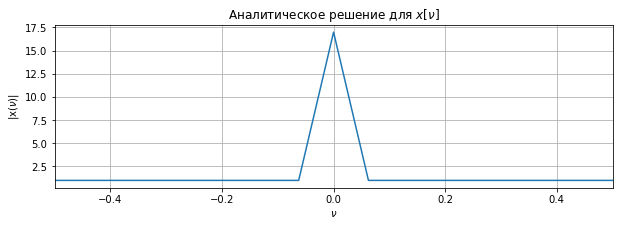

In [14]:
analyt_nu = np.linspace(-0.5, 0.5, num=N)
numerator = np.sin(np.pi * N * analyt_nu)
denominator = np.sin(np.pi * analyt_nu)
analyt_x = []
for (n, d) in zip(numerator, denominator):
    if np.equal(d, 0):
        analyt_x.append(N)
        continue
    analyt_x.append(np.abs(n / d))

plt.figure(figsize=[10, 3])
plt.title('Аналитическое решение для $x[\\nu]$')
plt.ylabel("|x($\\nu$)|")
plt.xlabel("$\\nu$")
plt.xlim([-0.5, 0.5])
plt.plot(analyt_nu, analyt_x)
plt.grid()

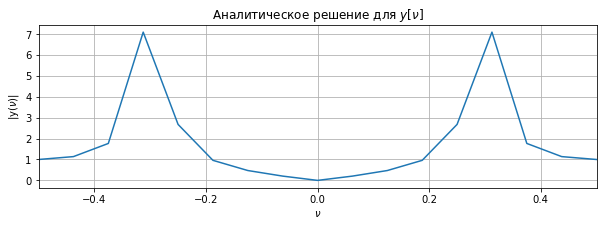

In [18]:
analyt_nu = np.linspace(-0.5, 0.5, num=N)
nu0 = n_0 / N

def shifted_ones_spectrum(nu, M):
    return np.sin(np.pi * M * nu) / np.sin(np.pi * nu) * np.exp(-1j * np.pi * (M-1) * nu )

fimage = 0.5 * (shifted_ones_spectrum(analyt_nu - nu0, N) + shifted_ones_spectrum(analyt_nu + nu0, N))

plt.figure(figsize=[10, 3])
plt.title('Аналитическое решение для $y[\\nu]$')
plt.ylabel("|y($\\nu$)|")
plt.xlabel("$\\nu$")
plt.xlim([-0.5, 0.5])
plt.plot(analyt_nu, np.abs(fimage))
plt.grid()

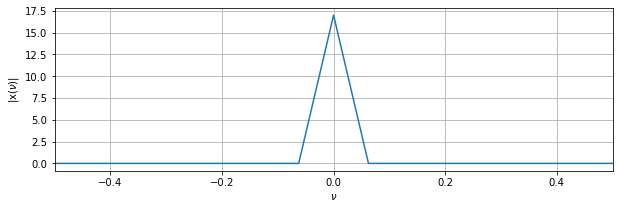

In [61]:
x_spectrum = np.fft.fftshift(np.fft.fft(x, n=N))
x_nu = np.linspace(-0.5, 0.5, num=N)

plt.figure(figsize=[10, 3])
plt.ylabel("|x($\\nu$)|")
plt.xlabel("$\\nu$")
plt.xlim([-0.5, 0.5])
plt.plot(x_nu, np.abs(x_spectrum))
plt.grid()

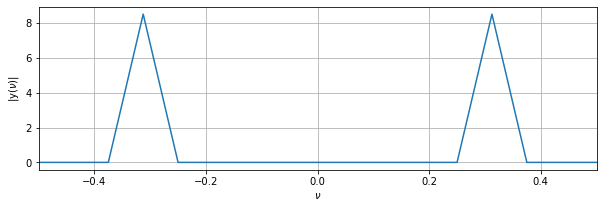

In [23]:
spectrum = np.fft.fftshift(np.fft.fft(y, n=N))
nu = np.linspace(-0.5, 0.5, num=N)

plt.figure(figsize=[10, 3])
plt.ylabel("|y($\\nu$)|")
plt.xlabel("$\\nu$")
plt.xlim([-0.5, 0.5])
plt.plot(nu, np.abs(spectrum))
plt.grid()

## Задача 1.2. Симметрия ДВПФ

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |    10 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|    $N$    | 12 | 17 | 14 | 15 | 13 | 16 | 20 | 24 | 22 | 18 |


Создайте произвольную действительную последовательность отсчетов $x[k]$ длиной $N$ отсчетов. Постройте с помощью компьютерного моделирования графики следующих функций  для частот $\nu \in [-0.5, \; 0.5]$:
* модуль ДВПФ $|X(\nu)|$,
* фазовая часть ДВПФ $\varphi(\nu)=\angle X(\nu)$,
* действительная часть ДВПФ $\text{Re } X(\nu)$,
* мнимая  часть ДВПФ $\text{Im } X(\nu)$.

Определите, являются ли они симметричными либо антисимметричными относительно нулевой частоты.

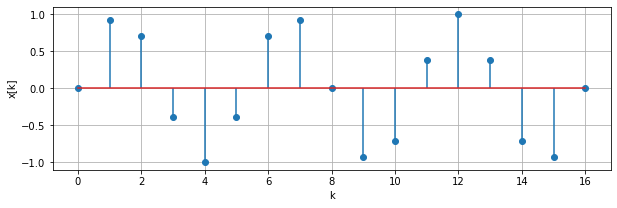

In [19]:
x = np.sin(2 * np.pi * np.arange(N) * 3 / 16)
plot_stem(np.arange(N), x, ylbl="x[k]")

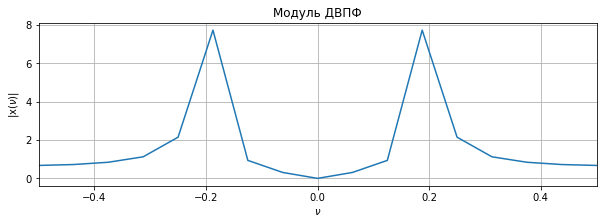

In [20]:
spectrum = np.fft.fftshift(np.fft.fft(x, n=N))
nu = np.linspace(-0.5, 0.5, num=N)

plt.figure(figsize=[10, 3])
plt.ylabel("|x($\\nu$)|")
plt.xlabel("$\\nu$")
plt.title('Модуль ДВПФ')
plt.xlim([-0.5, 0.5])
plt.plot(nu, np.abs(spectrum))
plt.grid()

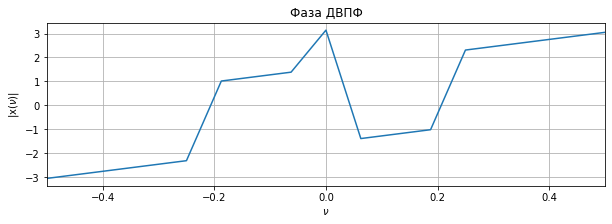

In [67]:
plt.figure(figsize=[10, 3])
plt.ylabel("x($\\nu$)")
plt.xlabel("$\\nu$")
plt.title('Фаза ДВПФ')
plt.xlim([-0.5, 0.5])
plt.plot(nu, np.angle(spectrum))
plt.grid()

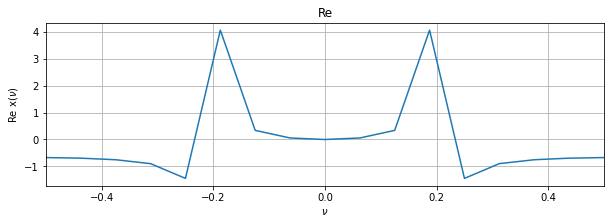

In [69]:
plt.figure(figsize=[10, 3])
plt.ylabel("Re x($\\nu$)")
plt.xlabel("$\\nu$")
plt.title('Re')
plt.xlim([-0.5, 0.5])
plt.plot(nu, np.real(spectrum))
plt.grid()

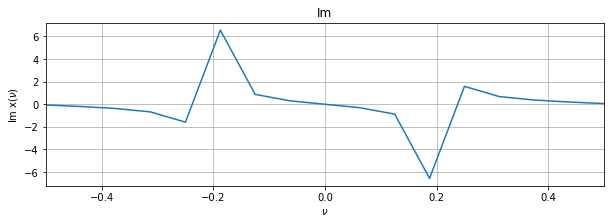

In [71]:
plt.figure(figsize=[10, 3])
plt.ylabel("Im x($\\nu$)")
plt.xlabel("$\\nu$")
plt.title('Im')
plt.xlim([-0.5, 0.5])
plt.plot(nu, np.imag(spectrum))
plt.grid()

# Модуль 2. Свойства ДПФ.




## Задача 2.1. Циклический сдвиг ДПФ

| Варианты: |  $x[k]$  | $n_0$ |  $l$  |
|:---------:|:--------:|:----:|:-----:|
|**1**|$$\{\underbrace{4.1}_{k=0} \;\;3.5\;\;1.2\;\;5.0\;\;2.0\;\;3.3\}$$|  -3  |  6  |
|**2**|$$\{\underbrace{3.8}_{k=0}\;\;8.3\;\;0.1\;\;9.1\;\;1.5\;\;10.0\;\;5.1\;\;1.9\}$$|  4  |  8 |
|**3**|$$\{\underbrace{2.8}_{k=0}\;\;0\;\;4.6\;\;0\;\;0.9\;\;0\;\;9.0\;\;0\;\;6.4\;\;0\;\;8.2\;\;0\}$$|  3  |  12  |
|**4**|$$\{\underbrace{2.8}_{k=0} \;\;4.6\;\;0.9\;\;3.8\;\;5.0\;\;1.7\}$$|  3  |  6  |
|**5**|$$\{\underbrace{4.1}_{k=0} \;\;3.5\;\;1.2\;\;5.0\;\;3.0\;\;2.3\;\;5.3\;\;2.1\}$$| -4  |  8  |
|**6**|$$\{\underbrace{3.8}_{k=0}\;\;0\;\;8.3\;\;0\;\;9.1\;\;0\;\;1.9\;\;0\}$$|  -2  |  8  |
|**7**|$$\{\underbrace{0.1}_{k=0}\;\;0.2\;\;0.3\;\;0.4\;\;0.5\;\;0.6\;\;0.7\;\;0.8\}$$|  -5  |  8  |
|**8**|$$\{\underbrace{0.8}_{k=0}\;\;0.7\;\;0.6\;\;0.5\;\;0.4\;\;0.3\;\;0.2\;\;0.1\}$$|  5  |  8  |
|**9**|$$\{\underbrace{0.1}_{k=0}\;\;0.2\;\;0.4\;\;0.8\;\;1.6\;\;3.2\;\;6.4\;\;12.8\}$$|  7  |  8  |
|**10**|$$\{\underbrace{12.8}_{k=0}\;\;6.4\;\;3.2\;\;1.6\;\;0.8\;\;0.4\;\;0.2\;\;0.1\}$$|  -7  |  8  |

Пусть $x[k]\overset{\text{ДПФ}}\longleftrightarrow X[n]$,  $y[k] \overset{\text{ДПФ}}\longleftrightarrow  Y[n]$, $Y[n]=X[(n+n_0) \mod l],$


1) Вычислите аналитически последовательность $y[k]$ без непосредственного вычисления ДПФ $x[k]$, используя свойства ДПФ.

2) Проведедите моделирование в Python. 
- Вычислите ДПФ $X[n]$ последовательности $x[k]$ (```fft(x)```).
- Осуществите циклический сдвиг $X[n]$ (```np.roll(X, n0)```).
- Вычислите обратное ДПФ для $Y[n]$ (```ifft(Y)```).

Аналитический способ: смотрим в обратную сторону - пусть x и y это спектры. Тогда Для сдвига сигнала Y на $n_0$ надо домножить его спектр на соответствующую экспоненту. Следовательно чтобы получить y нам надо поделить x на эту экспоненту.

In [118]:
x = np.array([3.8, 8.3, 0.1, 9.1, 1.5, 10.0, 5.1, 1.9])
l = 8
n0 = 4

analytical = x * np.exp(1j * 2 * np.pi * np.arange(l) * n0 / l)

X = np.fft.fft(x)
Y = np.roll(X, n0)
y = np.fft.ifft(Y)
print(analytical)
print(y)

[  3.8+0.00000000e+00j  -8.3+1.01645684e-15j   0.1-2.44929360e-17j
  -9.1+3.34328576e-15j   1.5-7.34788079e-16j -10. +6.12323400e-15j
   5.1-3.74741921e-15j  -1.9+1.62878024e-15j]
[  3.8+0.j  -8.3+0.j   0.1+0.j  -9.1+0.j   1.5+0.j -10. +0.j   5.1+0.j
  -1.9+0.j]


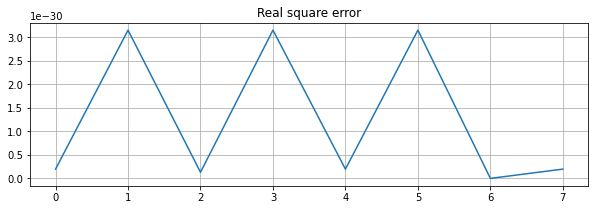

In [121]:
plt.figure(figsize=[10, 3])
plt.title('Real square error')
plt.plot(np.square(np.real(y) - np.real(analytical)))
plt.grid()

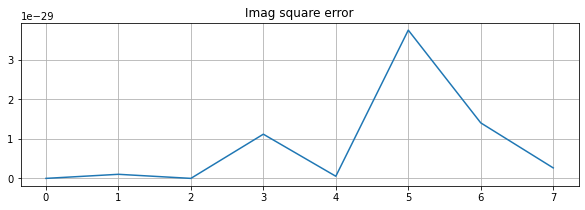

In [120]:
plt.figure(figsize=[10, 3])
plt.title('Imag square error')
plt.plot(np.square(np.imag(y) - np.imag(analytical)))
plt.grid()

## Задача 2.2. Энергия и мощность дискретного сигнала.

| Варианты:|$$X[0]$$| $X[1]$ | $X[2]$ | $X[3]$ | $X[4]$ | $X[5]$ |$$X[6]$$|
|:--------:|:------:|:------:|:------:|:------:|:------:|:------:|:------:|
|  **1**  |  12  | $$-7-5j$$ | $$1-8j$$ | $$4+3j$$ | $$2+6j$$ | $$4-4j$$ | 0 |
|  **2**  |  13  |  $$6-5j$$ | $$8-6j$$ | $$5+5j$$ |$$-3+4j$$ | $$5+9j$$ | 0 |
|  **3**  |  10  |  $$2-7j$$ | $$0+8j$$ | $$8-8j$$ | $$0+6j$$ |$$-1+9j$$ | 9 |
|  **4**  |  14  |  $$5+9j$$ | $$5+7j$$ | $$4+6j$$ | $$3-3j$$ |$$-1-5j$$ | 5 |
|  **5**  |  11  | $$-4-5j$$ | $$8-3j$$ |$$-2+9j$$ |$$-3+8j$$ | $$2-9j$$ |-4 |
|  **6**  |  10  | $$-6+3j$$ | $$6+3j$$ | $$6-1j$$ | $$1-6j$$ | $$9+5j$$ | 5 |
|  **7**  |  12  | $$-7-5j$$ | $$1-8j$$ | $$4+3j$$ | $$2+6j$$ | $$4-4j$$ | 0 |
|  **8**  |  13  |  $$6-5j$$ | $$8-6j$$ | $$5+5j$$ |$$-3+4j$$ | $$5+9j$$ | 0 |
|  **9**  |  10  |  $$2-7j$$ | $$0+8j$$ | $$8-8j$$ | $$0+6j$$ |$$-1+9j$$ | 9 |
|  **10**  |  14  |  $$5+9j$$ | $$5+7j$$ | $$4+6j$$ | $$3-3j$$ |$$-1-5j$$ | 5 |

Пусть 
$$
X[n]= \sum_{k=0}^{11} x[k] \exp \left(-j \dfrac{2\pi}{N} nk \right)
$$
— 12-точечное ДПФ действительной последовательности $x[k]$ и пусть заданы бины ДПФ в соответствии с вариантом.

1) Воспользовавшись свойствами симметрии, определите значения всех отсчетов ДПФ на одном периоде. 

2) Определите среднее арифметическое значение элементов последовательности $x[k]$:
$$\dfrac{1}{N} \sum_{k=0}^{N-1} x[k]$$
 с использованием значения отсчета ДПФ с номером $n=0$.

3) С использованием равенства Парсеваля для ДПФ определить энергию дискретного сигнала $x[k]$

$$ \sum_{k=0}^{N-1} |x[k]|^2 $$

и мощность для его периодического продолжения с периодом 12
$$ \dfrac{1}{N} \sum_{k=0}^{N-1} |x[k]|^2. $$


4) Вычислите обратное ДПФ с помощью функции ```ifft```, а затем энергию и среднее арифметическое для $x[k]$. 
Сравните с результатами, полученными в п.2 и п.3.


# Ответы
1. 
   1. $X[7] = X^*[N - n] =  X^*[5] = 5 - 9j$
   2. $X[8] =  X^*[4] = -3 - 4j$
   3. ...

2. X[0] / N = 13 / 12
3. $ \sum_{k=0}^{N-1} |x[k]|^2 = \frac{1}{N} \sum_{k=0}^{N-1}|X[n]|^2 $

In [3]:
x = [13, 6 - 5j, 8 - 6j, 5 + 5j, -3 + 4j, 5 + 9j, 0]
x_sym = [0] * 5
N = 12
for n in range(7, N - 1):
    x.append(np.conjugate(x[12 - n]))
print(x)

[13, (6-5j), (8-6j), (5+5j), (-3+4j), (5+9j), 0, (5-9j), (-3-4j), (5-5j), (8+6j)]


In [4]:
spectr = np.array(x)
energy = np.mean(np.square(np.abs(spectr)))
power = energy / N
print(f"3) Энергия сигнала {energy}")
print(f"3) POwer сигнала {power}")

3) Энергия сигнала 72.0
3) POwer сигнала 6.0


In [23]:
signal = np.fft.ifft(spectr)
mean = np.mean(signal)
print(f"4) Среднее {mean} ({13 / N})")
ienergy = np.sum(np.square(np.abs(signal)))
print(f"4) Энергия сигнала {ienergy}")

4) Среднее (1.1818181818181819+0j) (1.0833333333333333)
4) Энергия сигнала 72.0


## Задача 2.3. ДПФ как коэффициенты разложения по базису


| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |    10 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|   **N**   | 12 | 16 | 14 | 16 | 18 | 16 | 24 | 20 | 18 | 16 |
|   $r_1$   |  3 |  2 |  6 |  7 |  7 |  1 |  7 |  3 |  3 |  2 |
|   $r_2$   |  5 |  4 |  2 |  3 |  5 |  4 |  5 |  7 |  5 |  5 |

Вычислите коэффициенты $N$ – точечного ДПФ $X[n]$ для 
$$
\begin{equation} 
x[k]=\left\{\begin{array}{l}\cos \left( \dfrac{2\pi}{N} r_1 k\right) + \sin \left( \dfrac{2\pi}{N} r_2 k\right) ,\;0\leq k\leq N-1;\\0,\;\;\text{при других  } k.\end{array}\right.
\end{equation}
$$
при заданных $r_1$ и $r_2$ с помощью
 
 * формулы вычисления ДПФ
 * теоремы смещения для ДПФ 
 * как коэффиценты разложения сигнала $x[k]$ по базису из комплексно-экспоненциальных функций  $\varphi_n[k]=\exp(j \dfrac{2\pi}{N} n k)$
 * с помощью функции ```fft```
 
 Сравните результаты. Постройте графики для $|X[n]|$, $\angle X[n]$, $\text{Re } X[n]$, $\text{Im }X[n]$.

# Модуль 3. Связь между ДПФ и ДВПФ. Частотная ось ДПФ.

## Задача 3.1. Связь ДПФ и ДВПФ для последовательностей конечной длительности.  
##Прямоугольное окно длиной N

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |    10 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|   **N**   | 16 | 20 | 18 | 16 | 14 | 12 | 20 | 24 | 30 | 32 |
  
Дана $N$-точечная последовательность $w[k]=\sum_{m=0}^{N-1} \mathbf{1} [k-m]$.  

* Изобразить график последовательности $w[k]$ средствами Python
* Вычислить с помощью `fft` ДПФ данной последовательности. Построить график.
* Дополнить последовательность $w[k]$ до $2N$ отсчетов нулями:
$$
y[k]=\left\{\begin{array}{l}
1, \text{при }  0 \le k \le N-1;
\\
0, \text{при } N \le k \le 2N-1.
\end{array}\right.
$$
При том изменяется только учитываемая длительность последовательности, влияющая на число отсчетов ДПФ.    
Сравнить результат работы `fft(w, 2*N)` c ДПФ для $y[k]$. Построить графики. 

* Повторить предыдущий пункт для последовательности $w[k]$ дополненой нулями до $4N$ отсчетов.

* Вычислить аналитически ДВПФ с помощью формулы прямого преобразования:
$$ W(\nu)= \sum_{k=-\infty}^{\infty} w[k]\exp(-j2\pi \nu k) $$  
Сравнить результат с работой функции `fft(w, 1024)`

* Построить график модуля ДВПФ $|W(\nu)|$ на отрезке $[-0.5, 0.5]$, используя функцию `fftshift`.



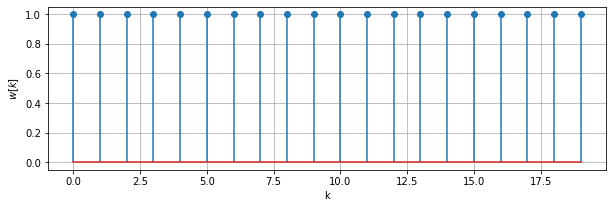

In [41]:
N = 20
w = np.ones(N)
plot_stem(np.arange(N), w, ylbl="$w[k]$", xlbl="k")

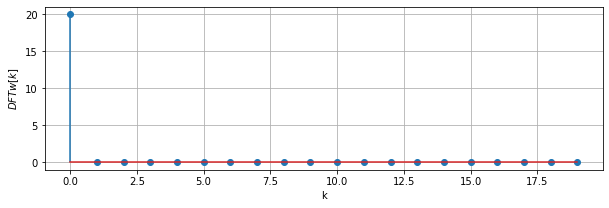

In [42]:
spectr = np.fft.fft(w, n=N)

plot_stem(np.arange(N), np.abs(spectr), ylbl="$DFT w[k]$", xlbl="k")

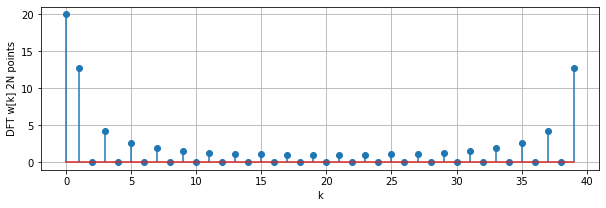

In [45]:
dup_w = np.concatenate([w, np.zeros(N)])
dup_spectr = np.fft.fft(dup_w, n=2*N)
plot_stem(np.arange(2 * N), np.abs(dup_spectr), ylbl="DFT w[k] 2N points", xlbl="k")

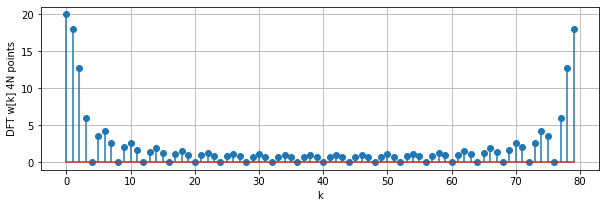

In [46]:
quad_w = np.concatenate([dup_w, np.zeros(2 * N)])
quad_spectr = np.fft.fft(quad_w, n=4*N)
plot_stem(np.arange(4 * N), np.abs(quad_spectr), ylbl="DFT w[k] 4N points", xlbl="k")

Аналитический ДВПФ: $X[\nu] = \frac{sin(\pi N \nu)}{sin(\pi\nu)}\exp(-j\pi\nu(N-1))$

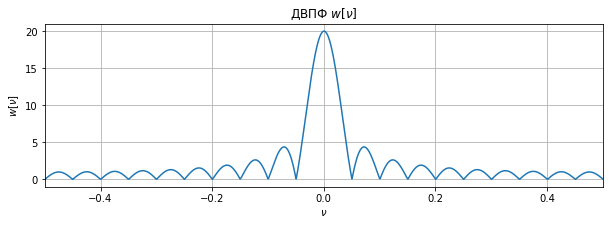

In [36]:
dvpf_w = np.fft.fftshift(np.fft.fft(w, n=1024))
nu_w = np.linspace(-0.5, 0.5, num=1024)

plt.figure(figsize=[10, 3])
plt.title('ДВПФ $w[\\nu]$')
plt.xlim([-0.5, 0.5])
plt.xlabel("$\\nu$")
plt.ylabel("$w[\\nu]$")
plt.plot(nu_w, np.abs(dvpf_w))
plt.grid()

## Задача 3.2. Связь между ДВПФ и ДПФ для периодических последовательностей. 

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |    10 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|   **N**   | 16 | 12 | 14 | 16 | 14 | 12 | 24 | 20 | 18 | 16 |
|   $r_1$   |  3 |  2 |  6 |  7 |  6 |  1 |  7 |  3 |  3 |  2 |
|   $r_2$   |  7 |  4 |  2 |  3 |  4 |  4 |  5 |  7 |  5 |  5 |

Задана периодическая последовательность с периодом $N$
$$x[k]=\sin(2\pi k r_1/N)+\cos(2\pi k r_2/N).$$ 
* Вычислите аналитически ДВПФ
* Вычислите с помощью моделирования $N$—точечное ДПФ этой последовательности $\tilde{X} [n]$ (с нормировкой на число отсчетов). 

* Сравните веса $\delta$-функций в ДВПФ и величины отсчетов ДПФ.

In [24]:
N = 12
r1 = 2
r2 = 4
k = np.arange(N)
x = np.sin(2 * np.pi * r1 / N * k) + np.cos(2 * np.pi * r2 / N * k)
fft = np.fft.fft(x, norm='backward')

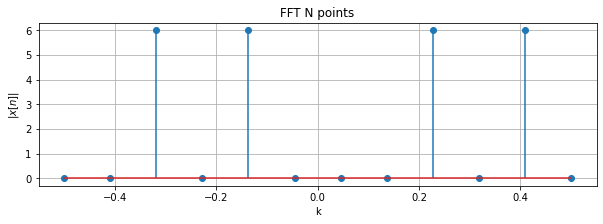

In [25]:
plt.figure(figsize=[10, 3])
plt.title('FFT N points')
plt.ylabel("$|x[n]|$")
plt.xlabel("k")
plt.stem(np.linspace(-0.5, 0.5, num=N), np.abs(fft))
plt.grid()

In [26]:
# imaginary part is zero
print(np.real(fft))

[ 1.33226763e-15  7.18727362e-16 -4.44089210e-15 -2.88657986e-15
  6.00000000e+00  2.83398632e-15  5.55481450e-15  2.83398632e-15
  6.00000000e+00 -2.88657986e-15 -4.44459147e-15  7.18727362e-16]


Веса $\delta$-функций ДВПФ равны $\frac{1}{N} X_N(\nu)$, где X это N-точечное ДВПФ

$X(\nu) = \frac{1}{N} X_N(\nu)\sum_{n=-\infty}^{\infty}\delta(\nu - \frac{n}{N})$


In [31]:
weights = 1 / N * np.fft.fftshift(np.fft.fft(x, n=N))
print(weights)
print(np.abs(weights))
    

[ 4.62901208e-16+3.70074342e-17j  2.36165526e-16+1.14319725e-16j
  5.00000000e-01+8.01234453e-16j -2.40548322e-16+2.77555756e-17j
 -3.70382623e-16+5.00000000e-01j  5.98939468e-17-1.42075300e-16j
  1.11022302e-16+0.00000000e+00j  5.98939468e-17+1.42075300e-16j
 -3.70074342e-16-5.00000000e-01j -2.40548322e-16-2.77555756e-17j
  5.00000000e-01-8.01234453e-16j  2.36165526e-16-1.14319725e-16j]
[4.64378163e-16 2.62379792e-16 5.00000000e-01 2.42144311e-16
 5.00000000e-01 1.54183903e-16 1.11022302e-16 1.54183903e-16
 5.00000000e-01 2.42144311e-16 5.00000000e-01 2.62379792e-16]


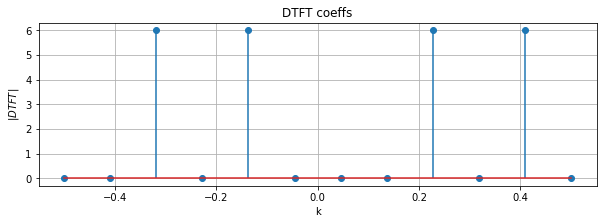

In [28]:
plt.figure(figsize=[10, 3])
plt.title('DTFT coeffs')
plt.ylabel("$|DTFT|$")
plt.xlabel("k")
plt.stem(np.linspace(-0.5, 0.5, num=N), np.abs(fft))
plt.grid()

## Задача 3.3. Сравнение вычислительной эффективности

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |    10 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|   **N**   |   512 |   512 |   256 |   256 |   512 |   512 |   512 |   512 |   512 |   256 |
|   **P**   | 32768 | 32768 | 65536 | 65536 | 32768 | 65536 | 32768 | 65536 | 32768 | 32768 |

Дана $N$-точечная последовательность отсчетов
$$ x[k]= \sin(2\pi kn_0/N)$$  
Посчитать ДВПФ с использованием Python в $P$ точках для этой последовательности, где $n_0$ выбранное вами целое число на отрезке $ 0 < n_0 < N/2 $
* используя формулы ДВПФ напрямую, 
* используя БПФ `fft(x, P)`. 

Сравнить максимальную ошибку и время работы программы в двух случаях. Построить график $|X(\nu)|$.

In [3]:
N = 512
P = 32768
n0 = 100
x = np.sin(2 * np.pi * n0 / N * np.arange(N))

In [30]:
%%time
man_spectrum = [0] * P
x_ext = np.concatenate([x, np.zeros(P - N)])
exp_pow = -1j * 2 * np.pi / P * np.arange(P)
for p in range(P):
    man_spectrum[p] = np.sum(x_ext * np.exp(exp_pow * p))
man_spectrum = np.array(man_spectrum)

CPU times: user 44.6 s, sys: 4.12 ms, total: 44.6 s
Wall time: 44.6 s


In [27]:
%%time
fft_spectrum = np.fft.fft(x, n=P)

CPU times: user 2.91 ms, sys: 48 µs, total: 2.96 ms
Wall time: 1.49 ms


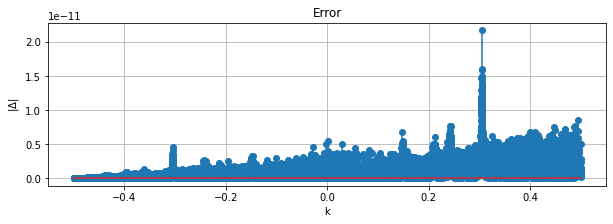

In [33]:
plt.figure(figsize=[10, 3])
plt.title('Error')
plt.ylabel("$|\\Delta|$")
plt.xlabel("k")
plt.stem(np.linspace(-0.5, 0.5, num=P), np.abs(fft_spectrum - man_spectrum))
plt.grid()

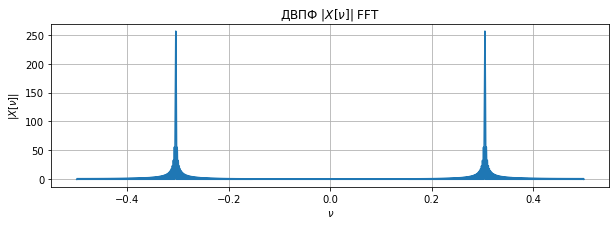

In [28]:
plt.figure(figsize=[10, 3])
plt.title('ДВПФ $|X[\\nu]|$ FFT')
plt.ylabel("$|X[\\nu]|$")
plt.xlabel("$\\nu$")
plt.plot(np.linspace(-0.5, 0.5, num=P), np.abs(fft_spectrum))
plt.grid()

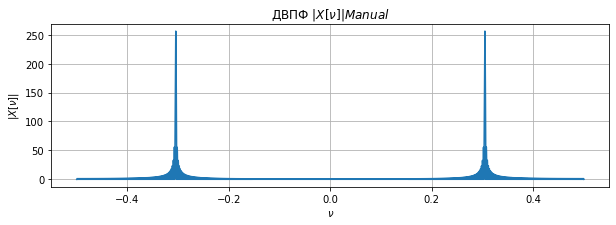

In [32]:
plt.figure(figsize=[10, 3])
plt.title('ДВПФ $|X[\\nu]| Manual$')
plt.ylabel("$|X[\\nu]|$")
plt.xlabel("$\\nu$")
plt.plot(np.linspace(-0.5, 0.5, num=P), np.abs(man_spectrum))
plt.grid()

## Задача 3.4. Частотная ось ДПФ (соответствие номеров отсчетов и частот).

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |
|:---------:|:----:|:-----:|:-----:|:-----:|:-----:|:-----:|
|**Аудиозапись:**|`vibraphone.wav`|`clarinet.wav`|`glockenspiel.wav`|`tuning-fork.wav`|`guitar.wav`|`flute.wav`|


| Варианты: |    7 |    8 |    9 |    10 |
|:---------:|:-----:|:-----:|:-----:|:-----:|
|**Аудиозапись:**|`clarinet.wav`|`glockenspiel.wav`|`tuning-fork.wav`|`guitar.wav`|

Для аудиозаписи вашего варианта:
* указать шаг и частоту дискретизации; 
* выбрать некоторый интервал отсчетов в информативной области сигнала и для него осуществить ДПФ-анализ, объяснить выбор этой области;
* определить с помощью ДПФ-анализа частоту основого колебания.

In [124]:
import scipy.io.wavfile as wavfile

In [128]:
dfreq, signal = wavfile.read("clarinet.wav")
step = 1 / dfreq
print(f"Frequency: {dfreq} Hz\nSampling step: {step}")

Frequency: 44100 Hz
Sampling step: 2.2675736961451248e-05


/tmp/ipykernel_9133/527567785.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  dfreq, signal = wavfile.read("clarinet.wav")


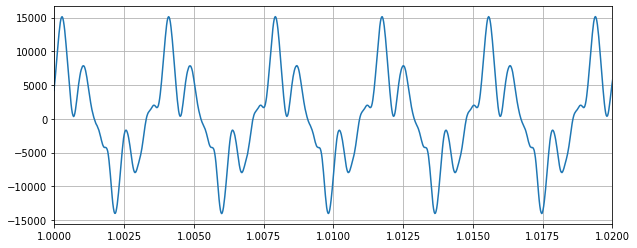

In [134]:
duration = step * len(signal)
plt.figure(figsize=[10,4])
plt.plot(np.linspace(0, duration, num=len(signal)), signal)
plt.xlim([1, 1.02])
plt.grid()

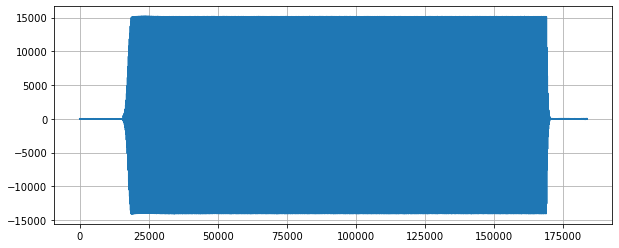

In [137]:
plt.figure(figsize=[10,4])
plt.plot(np.arange(len(signal)), signal)
plt.grid()

Видно, что информативная часть начинается с 25000 отсчета

In [156]:
start = 50000
chunk = 2**14
sig_data = signal[start : start + chunk]
spectrum = np.fft.fftshift(np.fft.fft(sig_data, norm="ortho"))

In [159]:
freq_cnts = np.linspace(-0.5, 0.5, num=len(spectrum)) * dfreq
dvpf = np.abs(spectrum)

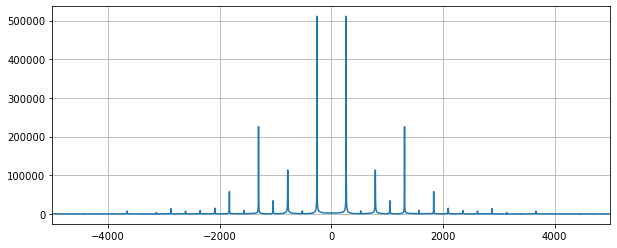

In [167]:
plt.figure(figsize=[10,4])
plt.plot(freq_cnts, dvpf)
plt.xlim([-5000, 5000])
plt.grid()

In [166]:
main_freq = abs(freq_cnts[np.argmax(np.abs(spectrum))])
print(f"Main frequency is {main_freq} Hz")

Main frequency is 259.7601171946527 Hz
